# Data Cleaning

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Mumbai_Train_final.csv')
df['Burden'] = df['Footfall (lakhs)']/df['Platforms']

k = (df['Platforms'].sum()/df.shape[0]).astype(int)
k2 = (df['Tracks'].sum()/df.shape[0]).astype(int)

df['Platforms'] = df['Platforms'].fillna(k)
df['Tracks'] = df['Tracks'].fillna(k2)
df['Distance From Previous of the Line'] = df['Distance From Previous of the Line'].replace('[KM]','',regex = True).astype(int)
df['Time taken From Previous of the Line'] = df['Time taken From Previous of the Line'].replace('[min]','',regex = True).astype(int)




Marine Lines
Grant Road
Mumbai Central
CSMT
CSMT
CSMT


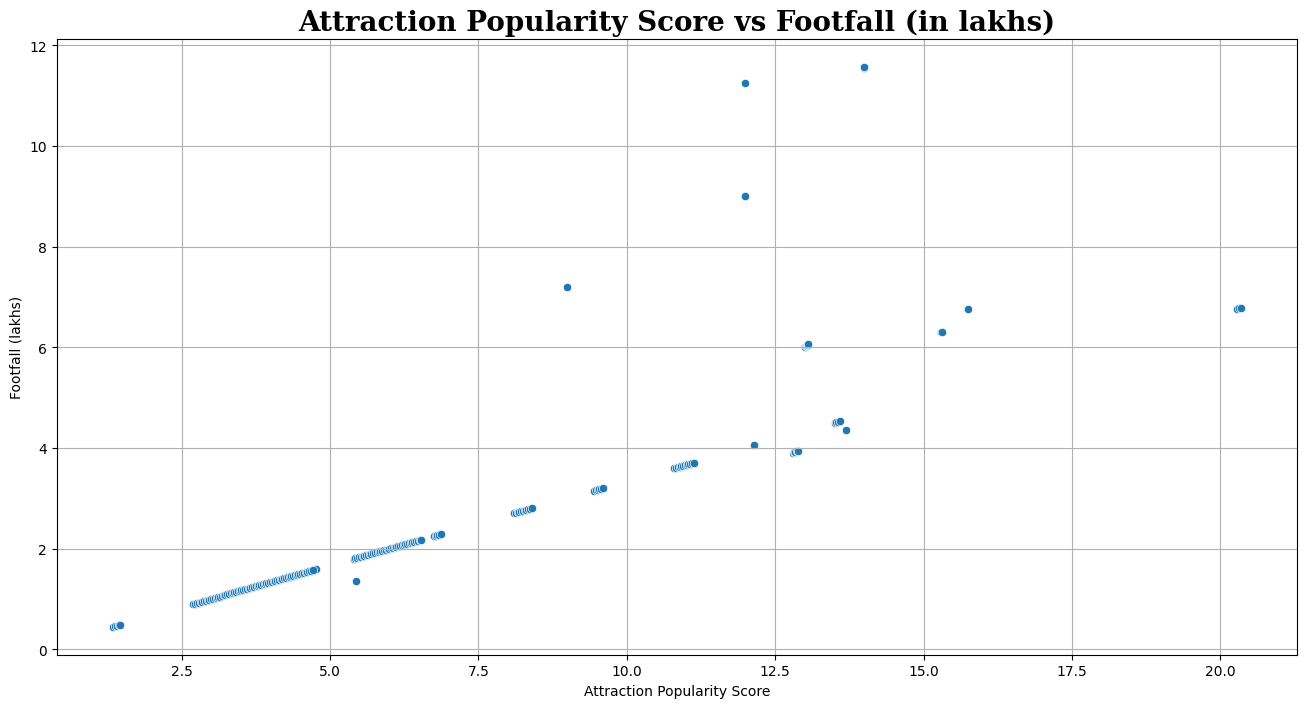

In [19]:
plt.figure(figsize = (16,8))

sns.scatterplot(x = 'Attraction Popularity Score',y = 'Footfall (lakhs)',data = df,label = '',marker = 'o')
for i in range(1,202):
    if (df.iloc[i,8]>7):
        print(df.iloc[i,0])

plt.title('Attraction Popularity Score vs Footfall (in lakhs)',fontdict = {'weight' :'bold','size' : 20,'family':'Serif'})
plt.grid()
plt.show()

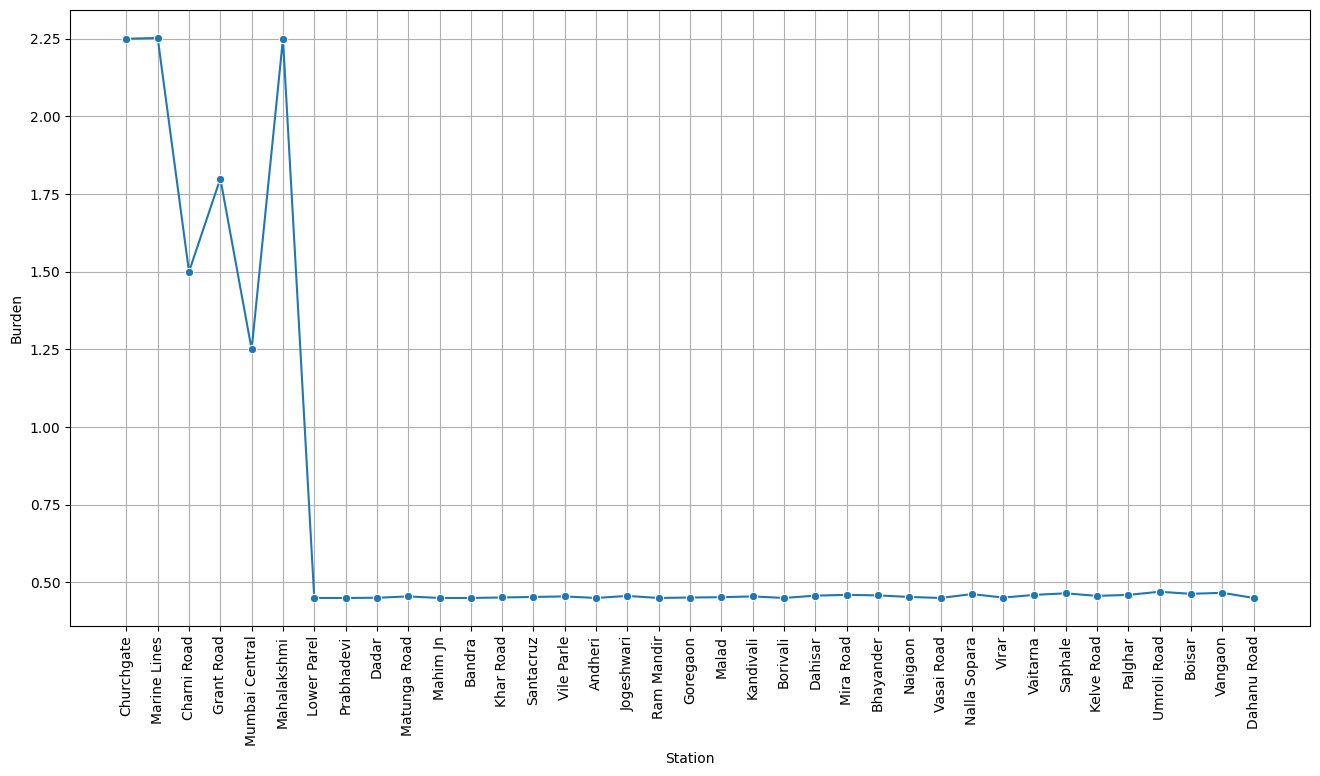

In [28]:
df1 = df[df['Line'] == 'Western']
plt.figure(figsize = (16,8))
sns.lineplot(data = df1,y = 'Burden',x = 'Station',marker = 'o')
# sns.lineplot(data = df1,y = 'Attraction Popularity Score',x = 'Station',marker = 'o')

plt.xticks(rotation = 90)
plt.grid()
plt.show()

In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time taken From Previous of the Line,202.0,5.663366,6.186612,0.00,3.000000,4.000000,6.00000,50.000
Platforms,202.0,3.910891,2.478159,1.00,2.000000,3.000000,4.00000,15.000
Tracks,202.0,4.757426,2.660859,1.00,3.000000,4.000000,6.00000,13.000
Year of Opening,83.0,1914.542169,52.801354,1853.00,1867.500000,1893.000000,1966.00000,2018.000
Footfall (lakhs),202.0,2.496436,2.043896,0.45,1.350000,1.825000,2.78750,11.570
Attraction Popularity Score,202.0,6.666782,3.855996,1.35,4.050000,5.475000,8.36250,20.340
Burden,202.0,0.676728,0.463721,0.45,0.461875,0.507083,0.62375,3.155


In [38]:
df2 = df.sort_values(by = 'Burden',ascending = False)

df = df.sort_values(by = 'Burden' ,ascending = False)
df = df[df['Burden']>2]

df

,Station,Station Code,Line,Distance From Previous of the Line,Time taken From Previous of the Line,Platforms,Tracks,Year of Opening,Footfall (lakhs),Attraction Popularity Score,Burden
82,Currey Road,CRD,Central 2,1,2,2.0,4.0,1915.0,6.31,15.31,3.1550
42,Currey Road,CRD,Central 1,1,2,2.0,4.0,1915.0,6.30,15.30,3.1500
1,Marine Lines,MEL,Western,1,3,4.0,4.0,1867.0,9.01,12.00,2.2525
0,Churchgate,CCG,Western,0,0,4.0,4.0,1867.0,9.00,12.00,2.2500
5,Mahalakshmi,MX,Western,1,3,3.0,3.0,1867.0,6.75,15.75,2.2500
